In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys


In [2]:
# 读取CSV文件
data = pd.read_csv('./data/yaleb.csv')  

# 将数据和标签分离
X = data.iloc[:, :-1].values  # 所有行，除了最后一列
y = data.iloc[:, -1].values   # 所有行，只取最后一列

In [3]:
class PCA_Manual:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # Covariance matrix
        cov = np.cov(X.T)
        
        # Eigenvalues, Eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # Sort Eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # Store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # Project data
        X = X - self.mean
        return np.dot(X, self.components.T)

进度：1/100

进度：100/100


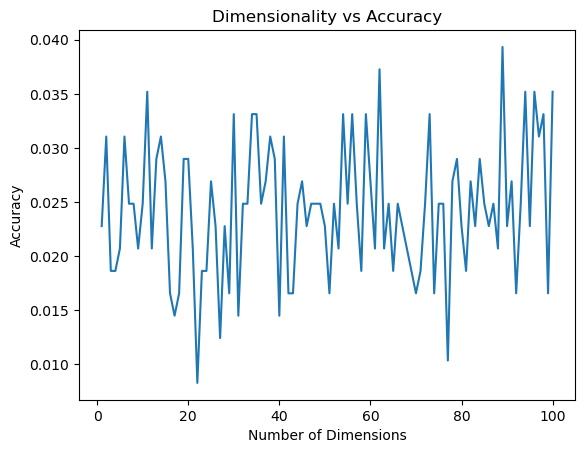

In [4]:
# 按照7:3的比例划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择降维的最大维度
max_dim = 100 
accuracies = []

for dim in range(1, max_dim + 1):
    sys.stdout.write('\r')
    sys.stdout.write("进度：{}/{}".format(dim, max_dim))
    sys.stdout.flush()

    # 应用PCA进行降维
    pca = PCA_Manual(n_components=dim)
    pca.fit(X_train)
    X_train_reduced = pca.transform(X_train)
    X_test_reduced = pca.transform(X_test)

    # 应用K-means聚类，这里以3个聚类为例
    kmeans = KMeans(n_clusters=15, n_init=10).fit(X_train_reduced)
    y_pred = kmeans.predict(X_test_reduced)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# 完成后换行
sys.stdout.write('\n')

# 绘制维度-准确率曲线
plt.plot(range(1, max_dim + 1), accuracies)
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.title('Dimensionality vs Accuracy')
plt.show()

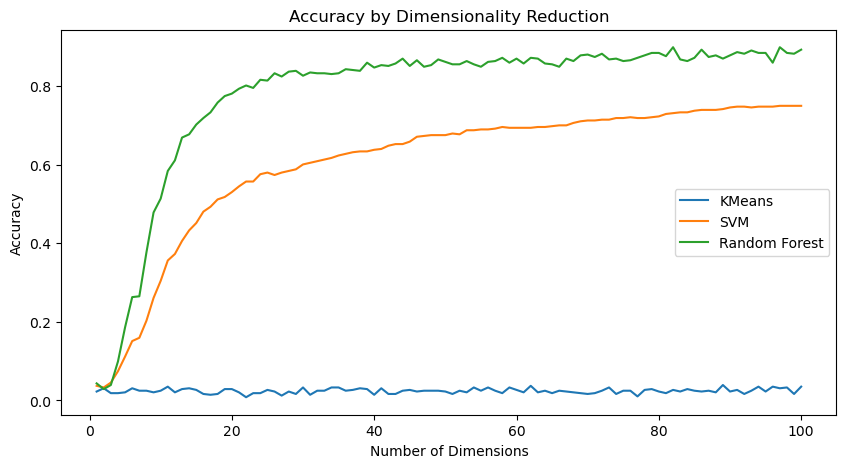

In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

svm_accuracies = []
for dim in range(1, max_dim + 1):
    pca = PCA_Manual(n_components=dim)
    pca.fit(X_train)
    X_train_reduced = pca.transform(X_train)
    X_test_reduced = pca.transform(X_test)
    
    svm = SVC()
    svm.fit(X_train_reduced, y_train)
    y_pred_svm = svm.predict(X_test_reduced)
    
    accuracy = accuracy_score(y_test, y_pred_svm)
    svm_accuracies.append(accuracy)

# 使用随机森林分类
rf_accuracies = []
for dim in range(1, max_dim + 1):
    pca = PCA_Manual(n_components=dim)
    pca.fit(X_train)
    X_train_reduced = pca.transform(X_train)
    X_test_reduced = pca.transform(X_test)
    
    rf = RandomForestClassifier()
    rf.fit(X_train_reduced, y_train)
    y_pred_rf = rf.predict(X_test_reduced)
    
    accuracy = accuracy_score(y_test, y_pred_rf)
    rf_accuracies.append(accuracy)

# 绘制不同降维维度下的准确率对比图
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_dim + 1), accuracies, label='KMeans')
plt.plot(range(1, max_dim + 1), svm_accuracies, label='SVM')
plt.plot(range(1, max_dim + 1), rf_accuracies, label='Random Forest')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by Dimensionality Reduction')
plt.show()